<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

/var/folders/8l/8xd_d13n62n0b347qjqcd8_80000gn/T/ipykernel_24241/3301562916.py:41: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Weight (Kilograms)'].fillna(data['Weight (Kilograms)'].mean(), inplace=True)
/var/folders/8l/8xd_d13n62n0b347qjqcd8_80000gn/T/ipykernel_24241/3301562916.py:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object

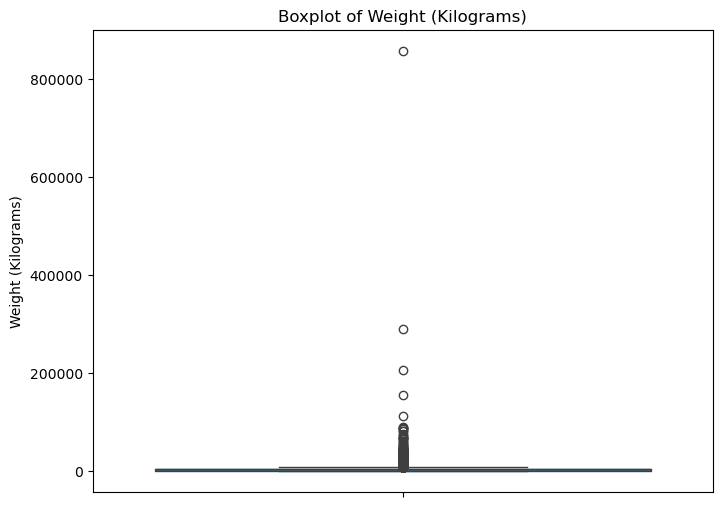

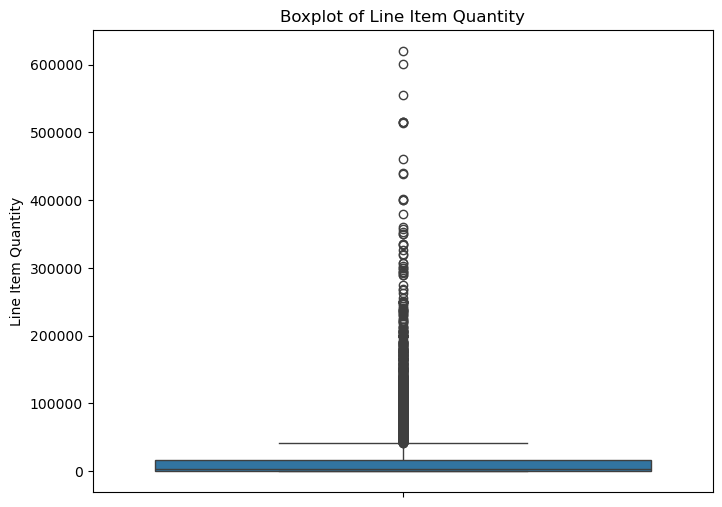

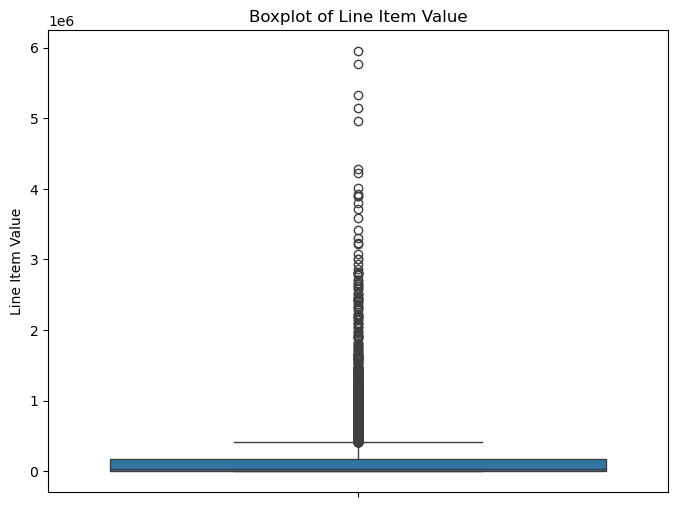

Original data count: 10306
Cleaned data count: 10306
Removed outlier samples: 0 


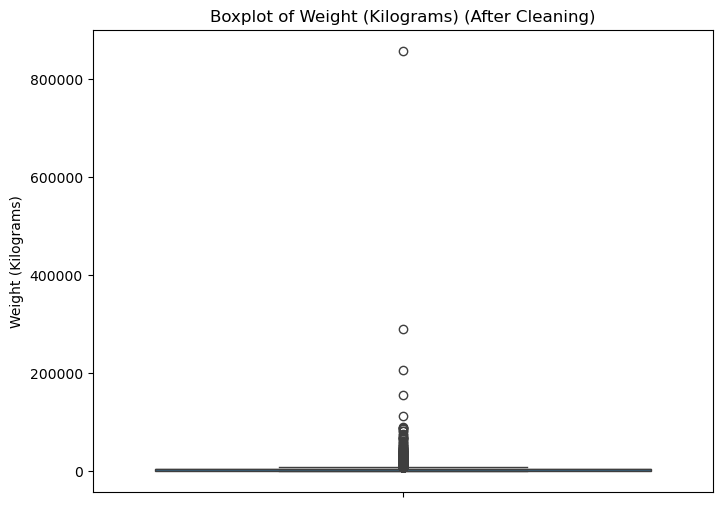

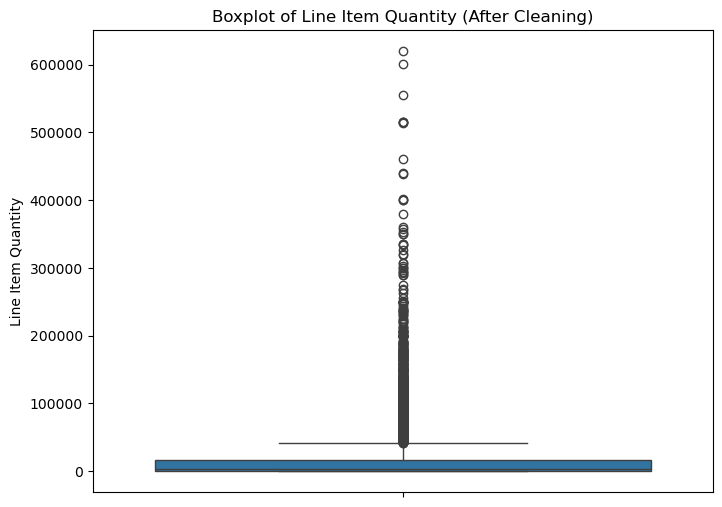

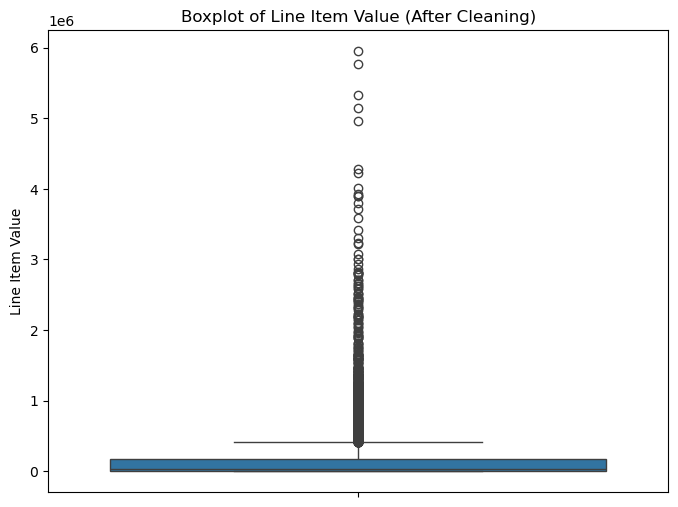

In [5]:
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("/Users/dudu/Desktop/capstone/SCMS_Delivery_History_Dataset.csv")

data

print(data.info())

print(data.describe())

# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

# Check for non-numeric data in numerical columns (non-numeric values will return True)
non_numeric_data = data[['Weight (Kilograms)', 'Freight Cost (USD)', 'Line Item Value', 'Pack Price', 'Unit Price', 'Line Item Insurance (USD)']].apply(pd.to_numeric, errors='coerce')
print(non_numeric_data.isnull().sum())

# Ensure all columns to be converted exist in the dataset
columns_to_convert = ['Weight (Kilograms)', 'Freight Cost (USD)', 'Line Item Value',
                      'Pack Price', 'Unit Price', 'Line Item Insurance (USD)']

# Iterate and check if the column exists in the data, then perform the conversion
for column in columns_to_convert:
    if column in data.columns:
        data[column] = pd.to_numeric(data[column], errors='coerce')
    else:
        print(f"Warning: Column '{column}' not found in data.")

# Handle missing values - fill with mean, median, etc., or delete rows with missing values
# Example: Fill Weight column with the mean
data['Weight (Kilograms)'].fillna(data['Weight (Kilograms)'].mean(), inplace=True)

# Handle missing values in Shipment Mode and Dosage columns
# Fill Shipment Mode column with "Unknown" as it is typically a categorical column
data['Shipment Mode'].fillna('Unknown', inplace=True)

# Fill Dosage column with the most frequent value (mode)
data['Dosage'].fillna(data['Dosage'].mode()[0], inplace=True)

# Check the results after conversion and filling
print("Missing values after imputation:")
print(data.isnull().sum())

# Verify data types are correct
print("\nData types:")
print(data.dtypes)

# If you need to remove rows with NaN, you can do the following:
# data.dropna(inplace=True)
numeric_columns = ['Weight (Kilograms)', 'Line Item Quantity', 'Line Item Value']

# Count missing values
print("Number of missing values in each column:")
print(data[numeric_columns].isnull().sum())

# Remove rows with missing values
data = data.dropna(subset=numeric_columns)

# Check for zero or negative values
for col in numeric_columns:
    invalid_count = (data[col] <= 0).sum()
    print(f"Number of values less than or equal to zero in column {col} ：{invalid_count}")

# Remove values less than or equal to zero
for col in numeric_columns:
    data = data[data[col] > 0]

# Descriptive statistics
print("Descriptive statistics of numerical columns:")
print(data[numeric_columns].describe())

# Draw box plots to visualize outliers
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data_cleaned' is your DataFrame and 'numeric_columns' is defined
for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=data[col])
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
    plt.show()

# Compare the data count before and after cleaning
original_count = data.shape[0]
# Assign data to data_cleaned
data_cleaned = data
cleaned_count = data_cleaned.shape[0]
removed_count = original_count - cleaned_count

print(f"Original data count: {original_count}")
print(f"Cleaned data count: {cleaned_count}")
print(f"Removed outlier samples: {removed_count} ")

# Redraw box plots to check the cleaning effect
for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=data_cleaned[col])
    plt.title(f"Boxplot of {col} (After Cleaning)")
    plt.show()

# One-hot encoding for categorical columns
data = pd.get_dummies(data, columns=['Shipment Mode', 'Vendor'], drop_first=True)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Scaling the numerical features
data[['Freight Cost (USD)', 'Weight (Kilograms)', 'Line Item Value']] = scaler.fit_transform(data[['Freight Cost (USD)', 'Weight (Kilograms)', 'Line Item Value']])
